# Plot
This file is used to do trend analysis, including drawing trend charts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
# load covid data
data = dict(np.load('./covid.npy', allow_pickle=True).item())

In [3]:
# construct tweet list and sort
with open ('./covid.data.txt', 'r') as f:
    with open('./covid.predict_new.txt', 'r') as f1:
        t = ''
        tids = f.readlines()
        labels = f1.readlines()
        time_list = []
        for i in range(len(tids)):
            tid = tids[i][:len(tids[i]) - 1].split(',')[0]
            if type(data[tid]) is not type(''):
                time_list.append({'id': tid, 'time': datetime.datetime(datetime.MINYEAR, 1, 1, tzinfo=datetime.timezone.utc) if type(data[tid]) is type('') else data[tid]['created_at'], 'label': labels[i][:len(labels[i]) - 1]})

        time_list.sort(key=lambda e: e['time'])

In [4]:
# do the counting
length = len(time_list)
gap = (time_list[length - 1]['time'] - time_list[0]['time']) / 20

split_point = time_list[0]['time'] + gap
rumour_count = 0
nonrumnour_count = 0
rumour_count_list = []
nonrumour_count_list = []
for i in range(length):
    item = time_list[i]
    if (item['time'] > split_point):
        split_point += gap
        rumour_count_list.append(rumour_count)
        nonrumour_count_list.append(nonrumnour_count)
        rumour_count = 0
        nonrumnour_count = 0
    else:
        if item['label'] == 'rumour':
            rumour_count += 1
        else:
            nonrumnour_count += 1

rumour_count_list.append(rumour_count)
nonrumour_count_list.append(nonrumnour_count)
rumour_prop = [rumour_count_list[i] / (rumour_count_list[i] + nonrumour_count_list[i]) for i in range(20)]

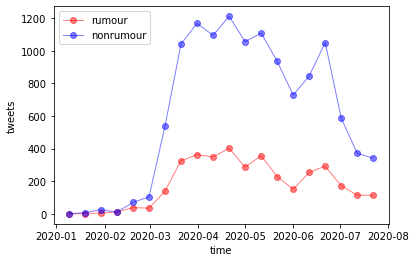

In [5]:
# plot the count trend chart
x_axis = [i * gap + time_list[0]['time'] for i in range(20)]
plt.plot(x_axis, rumour_count_list, 'ro-', alpha=0.5, linewidth=1, label='rumour')
plt.plot(x_axis, nonrumour_count_list, 'bo-', alpha=0.5, linewidth=1, label='nonrumour')

plt.legend()
plt.xlabel('time')
plt.ylabel('tweets')
plt.show()

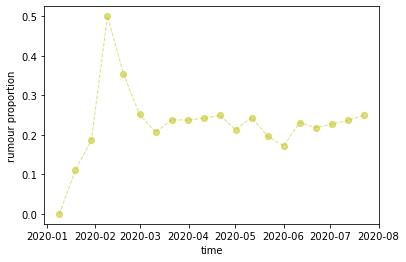

In [6]:
# plot the proportion trend chart
plt.plot(x_axis, rumour_prop, 'yo--', alpha=0.5, linewidth=1)
plt.xlabel('time')
plt.ylabel('rumour proportion')
plt.show()